# Regular Expressions for Tokenizing Text 

## Simple Approaches to Tokenization 

One approach is to split the text on whitespace

In [2]:
import re

In [3]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone though), 
'I won't have any pepper in my kitchen AT ALL. Soup does very well without--Maybe 
it's always pepper that makes people hot-tempered,'..."""
tokenized_raw = raw.split()
tokenized_raw

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [4]:
# Matches any space characters, but misses newline character and tabs
import re
re.split(r' ', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "\n'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "\nit's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [5]:
# The regular expression [ \t\n]+ matches one or more spaces, tabs (\t), and newlines )(\n)
# Note that the newline before 'it's' has diappeared.
re.split(r'[ \t\n]+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

There is a built-in expression \s that matches all whitespace characters.

In [6]:
# Returns the same result as above
re.split(r'\s+', raw)[20:40]

['in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

Another strategy for text tokenization is to tokenize not on whitespace but on any non-alphanumeric character. The expression \W does just that.

In [7]:
# \W matches all characters that are not letters, digits, and underscore.
# By using \W in a regular expression we split 
# on any input that is not word characters.
# Note that 'without Maybe' is now split into two separate words, 
# unlike in the previous code.
re.split(r'[\W]+', raw)

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

In [8]:
# Matches the words, not the spaces; first finds word characters; 
# If none is found, matches non-whitespace character (\S), followed by alphanumeric 
# character (w*)
# Two consecutive punctuation signs are separated, but 's or '-Maybe' is perceived as one unit.
re.findall(r'\w+|\S\w*', raw)

["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'I",
 'won',
 "'t",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '-',
 '-Maybe',
 'it',
 "'s",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 '-tempered',
 ',',
 "'",
 '.',
 '.',
 '.']

To match hyphens, we can use "\w+(?:[-]\w+)*. This would match words like hot-tempered and it's. To match quote characters add '

In [9]:
#The third part of the disjunct, [-.(]+ means that double hyphens -- and parenthesis 
# will be tokenized as individual items
re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)

["'",
 'When',
 "I'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'",
 'I',
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '--',
 'Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot-tempered',
 ',',
 "'",
 '...']

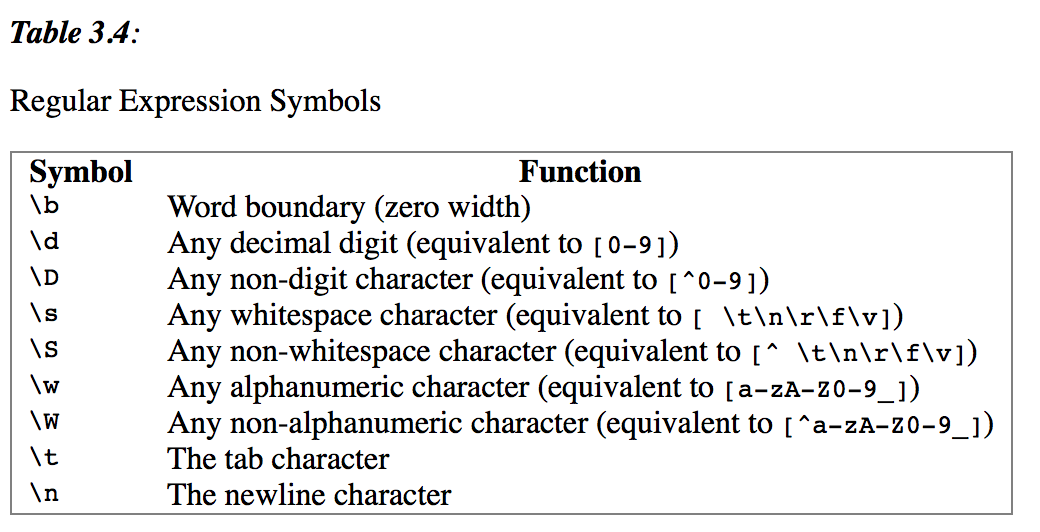

In [1]:
#To insert an image:
from IPython.display import Image
#Image(url = "http://localhost:8890/notebooks/NLTK_Chapter_3/reg_exp_2.png")
Image("/Users/anastasiasmirnova/anaconda2/NLTK_Chapter_3/reg_exp_2.png", width=800, height=400)

## NLTK's Regular Expression Tokenizer 

The expression nltk.regexp_tokenize() can be used in place of re.findall().
"The function ``regexp_tokenize()`` takes the text as its
first argument, and the regular expression pattern as its second
argument."

In [10]:
# Note: this code, from the texbook, does not give the right result. The solution is below.
import nltk
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)    # set flag to allow verbose regexps
        ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
        | \w+(-\w+)*        # words with optional internal hyphens
        | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
        | \.\.\.            # ellipsis
        | [][.,;"'?():-_`]
    ''' # these are separate tokens; includes ], [
nltk.regexp_tokenize(text, pattern)

[('', '', ''),
 ('A.', '', ''),
 ('', '-print', ''),
 ('', '', ''),
 ('', '', '.40'),
 ('', '', '')]

In [11]:
# The solution is to use non-capturing parenthesis, i.e. (?: )
pattern = r'''(?x)(?:[A-Z]\.)+|\w+(?:-\w+)*|\$?\d+(?:\.\d+)?%?|\.\.\.|[][.,;"'?():-_`]'''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

In [12]:
text.split()

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40...']

"We can evaluate a tokenizer by comparing the resulting tokens with a wordlist, and reporting any tokens that don't appear in the wordlist, using set(tokens).difference(wordlist). You'll probably want to lowercase all the tokens first."

Below we compare a raw and a tokenized version of the same text.

In [13]:
import nltk
nltk.corpus.treebank_raw.raw()[:200]

'.START \n\nPierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29.\nMr. Vinken is chairman of Elsevier N.V., the Dutch publishing group. \n\n.START \n\nRudolph Agnew, 55 years ol'

In [14]:
nltk.corpus.treebank.words()[:30]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.',
 'Mr.',
 'Vinken',
 'is',
 'chairman',
 'of',
 'Elsevier',
 'N.V.',
 ',',
 'the',
 'Dutch',
 'publishing',
 'group']

In [ ]:
nltk.tokenize
